# Wine Quality Dataset

## Descripción del Conjunto de Datos

Este conjunto de datos se relaciona con las variantes de vino tinto y vino blanco de origen portugués. El objetivo es modelar la calidad del vino en función de pruebas fisicoquímicas.

---

## Fuente

Los datos provienen de [Kaggle - Wine Quality](https://www.kaggle.com/datasets/rajyellow46/wine-quality).

---

## Descripción de las Variables

Variables: 13

| Variable                | Unidad / Escala                 | Tipo      | Descripción breve |
|---|---:|---:|---|
| `type`                  |                                 | Categorica  | Tipo de vino: white= Vino blanco, red=Vino tinto|
| `fixed acidity`         | g ácido tartárico / dm³         | Continua  | Acidez “fija” principal; no se evapora con facilidad. |
| `volatile acidity`      | g ácido acético / dm³           | Continua  | Acidez “volátil”; niveles altos pueden dar nota avinagrada. |
| `citric acid`           | g/dm³                            | Continua  | Aporta frescura y notas cítricas. |
| `residual sugar`        | g/dm³                            | Continua  | Azúcar no fermentado; influye en dulzor y cuerpo. |
| `chlorides`             | g cloruro de sodio / dm³        | Continua  | Contenido salino; valores altos afectan el sabor. |
| `free sulfur dioxide`   | mg/dm³                           | Continua  | SO₂ libre; fracción activa antioxidante/antimicrobiana. |
| `total sulfur dioxide`  | mg/dm³                           | Continua  | SO₂ total (libre + combinado); en exceso impacta percepción. |
| `density`               | g/cm³                            | Continua  | Relacionada con azúcar y alcohol. |
| `pH`                    | adimensional                     | Continua  | Medida de acidez; valores bajos implican más acidez. |
| `sulphates`             | g sulfato potásico / dm³        | Continua  | Estabilidad microbiana; puede influir en el sabor. |
| `alcohol`               | % vol                            | Continua  | Contenido alcohólico; a menudo correlaciona con calidad. |
| `quality`               | 0–10 (entero)                    | Ordinal   | Calificación sensorial por catadores. |

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import shutil
import os

/Users/angeleduardogamarrarios/Desktop/UDEM/Aprendizaje en la nube/Repositorios/MLOps_CML/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = kagglehub.dataset_download("rajyellow46/wine-quality")

# Definir carpeta destino en local (ej: datasets/glass dentro del proyecto)
dest_path = os.path.join(os.getcwd(), "../data", "")

# Crear carpeta si no existe
os.makedirs(dest_path, exist_ok=True)

# Copiar archivos descargados a la carpeta destino
for file in os.listdir(path):
    shutil.copy(os.path.join(path, file), dest_path)

In [3]:
mapeo_columnas = {
    'fixed acidity': 'fixed_acidity', 
    'volatile acidity': 'volatile_acidity',
    'citric acid': 'citric_acid', 
    'residual sugar': 'residual_sugar',
    'free sulfur dioxide': 'free_sulfur_dioxide',
    'total sulfur dioxide': 'total_sulfur_dioxide'
}

In [4]:
df_wine_quality = pd.read_csv("../data/winequalityN.csv")
df_wine_quality = df_wine_quality.rename(columns=mapeo_columnas)
df_wine_quality.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df_wine_quality['type'].value_counts() # nos vamos con el vino blanco  

type
white    4898
red      1599
Name: count, dtype: int64

Tipos de Datos y Valores Nulos

In [6]:
datos_white = df_wine_quality[df_wine_quality['type'] == 'white']
datos_white.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
print("\nInformación del DataFrame:")
print(datos_white.info())


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  4898 non-null   object 
 1   fixed_acidity         4890 non-null   float64
 2   volatile_acidity      4891 non-null   float64
 3   citric_acid           4896 non-null   float64
 4   residual_sugar        4896 non-null   float64
 5   chlorides             4896 non-null   float64
 6   free_sulfur_dioxide   4898 non-null   float64
 7   total_sulfur_dioxide  4898 non-null   float64
 8   density               4898 non-null   float64
 9   pH                    4891 non-null   float64
 10  sulphates             4896 non-null   float64
 11  alcohol               4898 non-null   float64
 12  quality               4898 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 535.7+ KB
None


Estadística Descriptiva y Distribución

In [8]:
print("\nEstadísticas Descriptivas:")
print(datos_white.describe().T)


Estadísticas Descriptivas:
                       count        mean        std      min         25%  \
fixed_acidity         4890.0    6.855532   0.843808  3.80000    6.300000   
volatile_acidity      4891.0    0.278252   0.100811  0.08000    0.210000   
citric_acid           4896.0    0.334250   0.120985  0.00000    0.270000   
residual_sugar        4896.0    6.393250   5.072275  0.60000    1.700000   
chlorides             4896.0    0.045778   0.021850  0.00900    0.036000   
free_sulfur_dioxide   4898.0   35.308085  17.007137  2.00000   23.000000   
total_sulfur_dioxide  4898.0  138.360657  42.498065  9.00000  108.000000   
density               4898.0    0.994027   0.002991  0.98711    0.991723   
pH                    4891.0    3.188203   0.151014  2.72000    3.090000   
sulphates             4896.0    0.489835   0.114147  0.22000    0.410000   
alcohol               4898.0   10.514267   1.230621  8.00000    9.500000   
quality               4898.0    5.877909   0.885639  3.00000

/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_5443/2328202740.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=datos_white, palette='viridis')


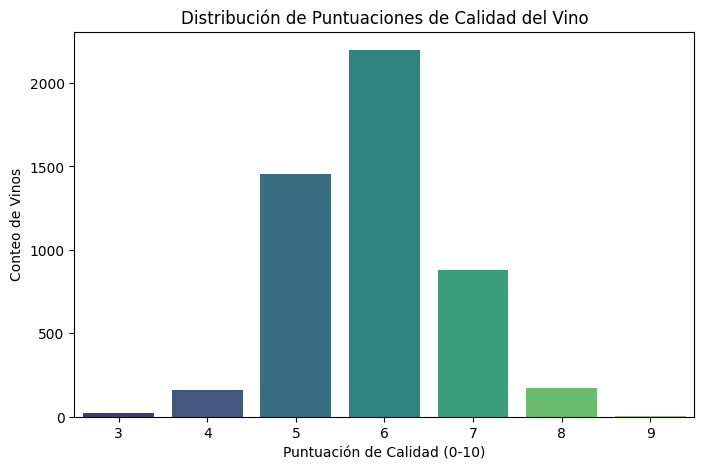

In [9]:
# --- Luego, ejecuta esta celda para el gráfico ---
plt.figure(figsize=(8, 5))
# La función 'countplot' necesita que 'data=' sea un DataFrame válido.
sns.countplot(x='quality', data=datos_white, palette='viridis')
plt.title('Distribución de Puntuaciones de Calidad del Vino')
plt.xlabel('Puntuación de Calidad (0-10)')
plt.ylabel('Conteo de Vinos')
plt.show();

type
white    1.0
Name: proportion, dtype: float64


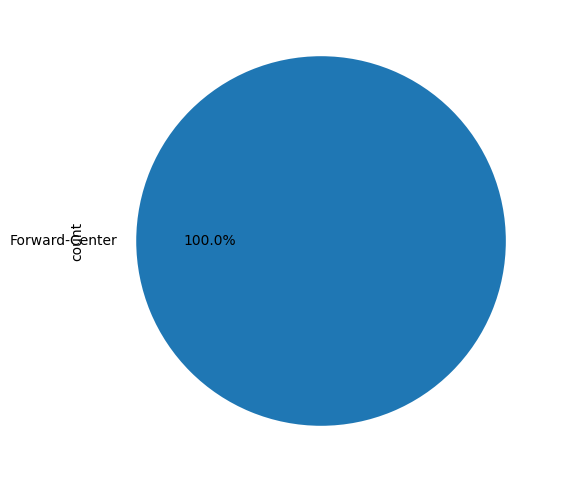

In [10]:
print(datos_white['type'].value_counts(normalize=True))
datos_white['type'].value_counts().plot.pie(labels=["Forward-Center","Point Guard",], autopct='%1.1f%%', figsize=(6, 6))
plt.show()

In [20]:
df_white['quality'] = df_white['quality'].astype(float)

In [21]:
#Separar las variables continuas de las demás
continuas=datos_white[["fixed_acidity",
                       "volatile_acidity",
                       "citric_acid",
                       "residual_sugar",
                       "chlorides",
                       "free_sulfur_dioxide",
                       "total_sulfur_dioxide",
                       "density",
                       "pH",
                       "sulphates",
                       "alcohol",
                       "quality"]]

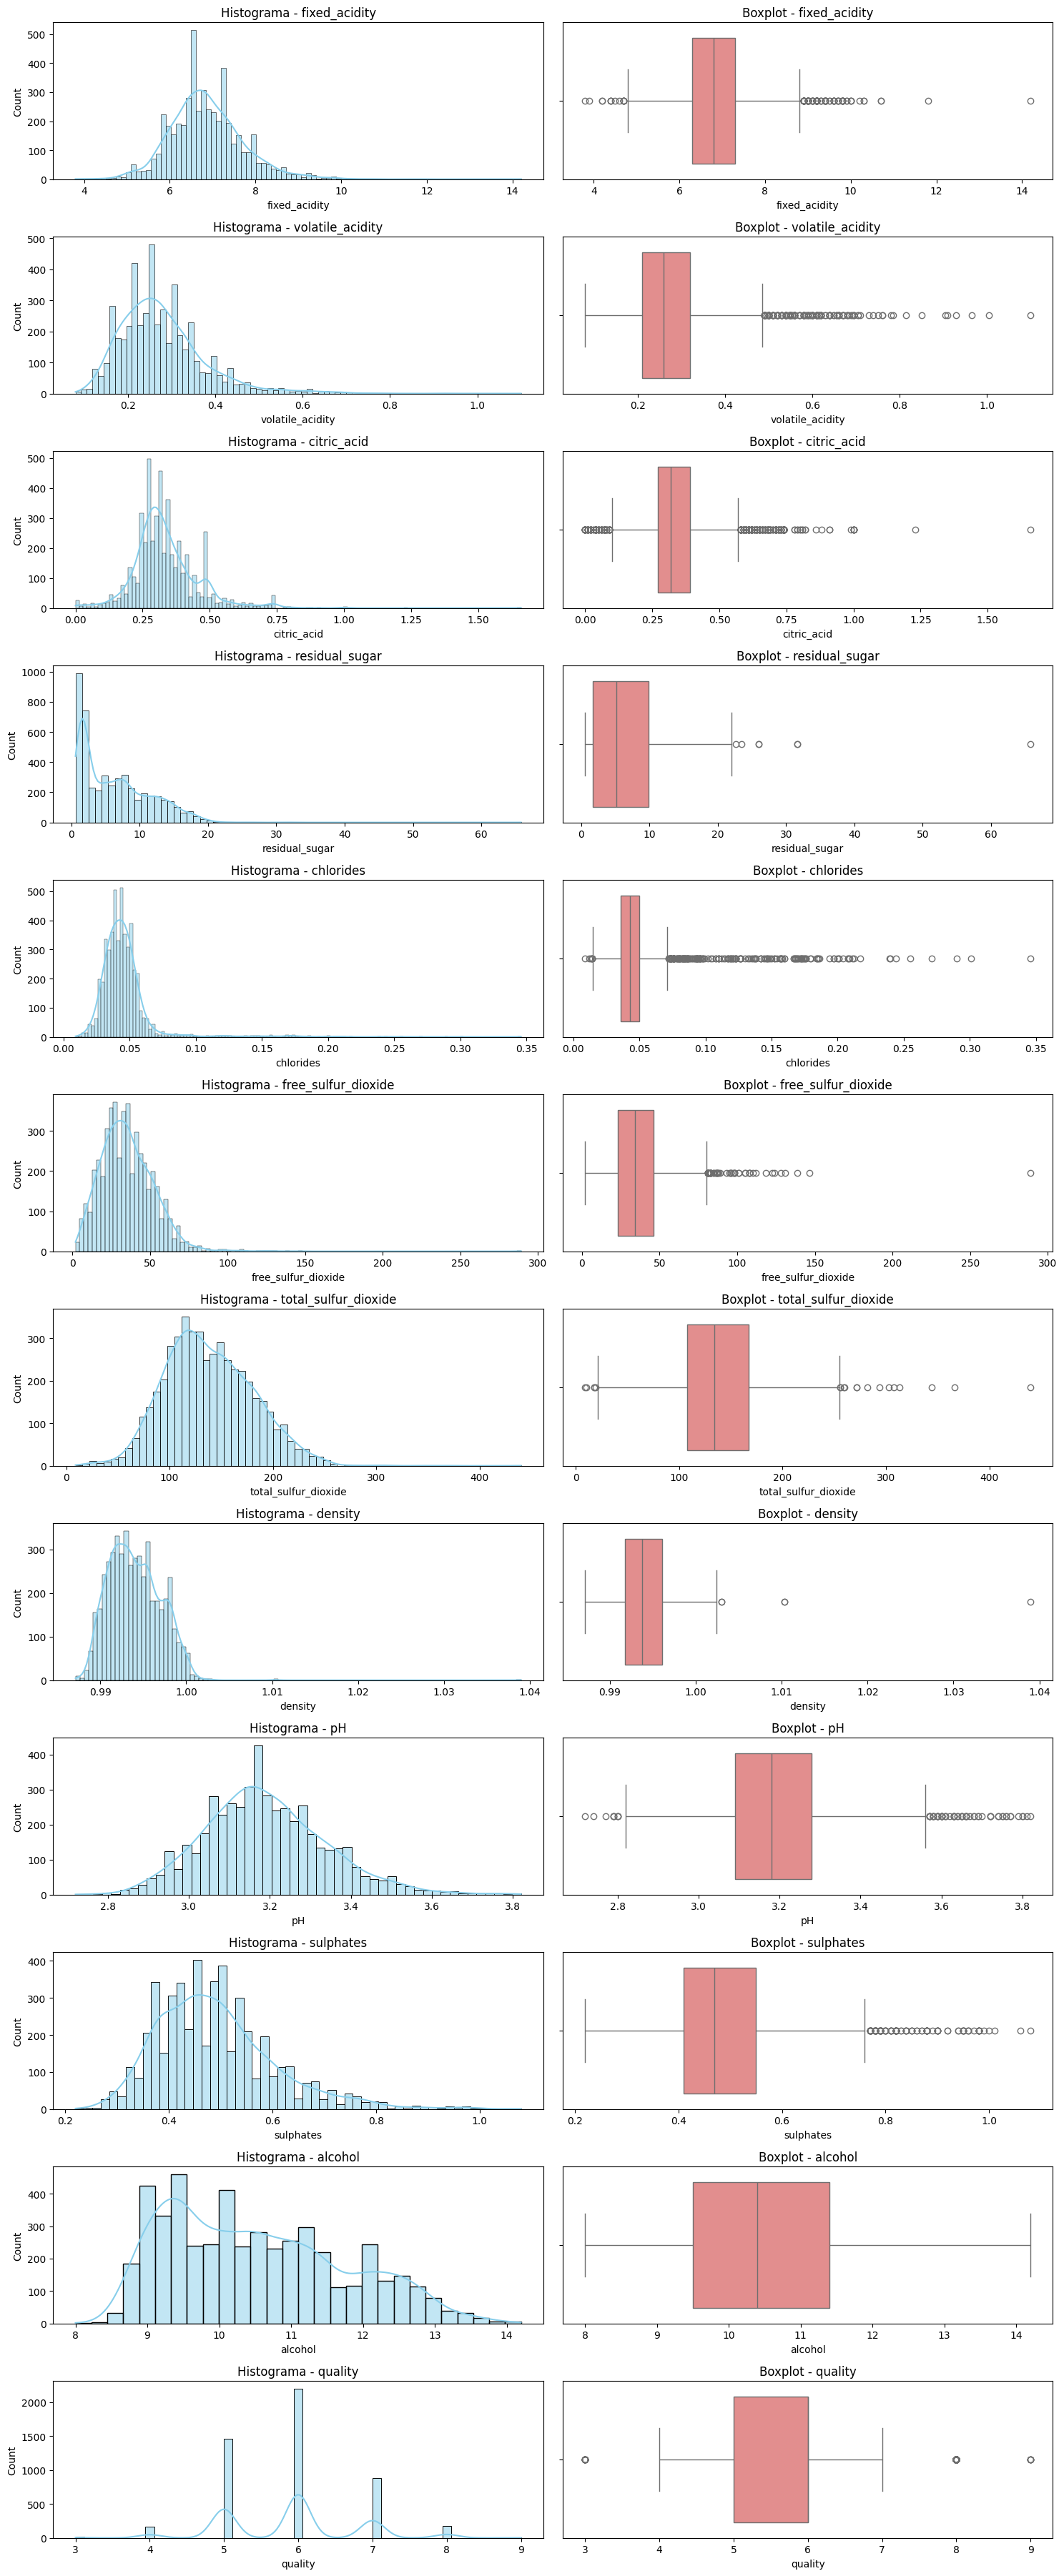

In [22]:

# Visualización: histogramas y boxplots
plt.figure(figsize=(15, len(continuas) * 3))

for i, col in enumerate(continuas):
    plt.subplot(len(continuas), 2, 2*i + 1)
    sns.histplot(continuas[col], kde=True, color='skyblue')
    plt.title(f'Histograma - {col}')
    
    plt.subplot(len(continuas), 2, 2*i + 2)
    sns.boxplot(x=continuas[col], color='lightcoral')
    plt.title(f'Boxplot - {col}')

plt.tight_layout()
plt.show()

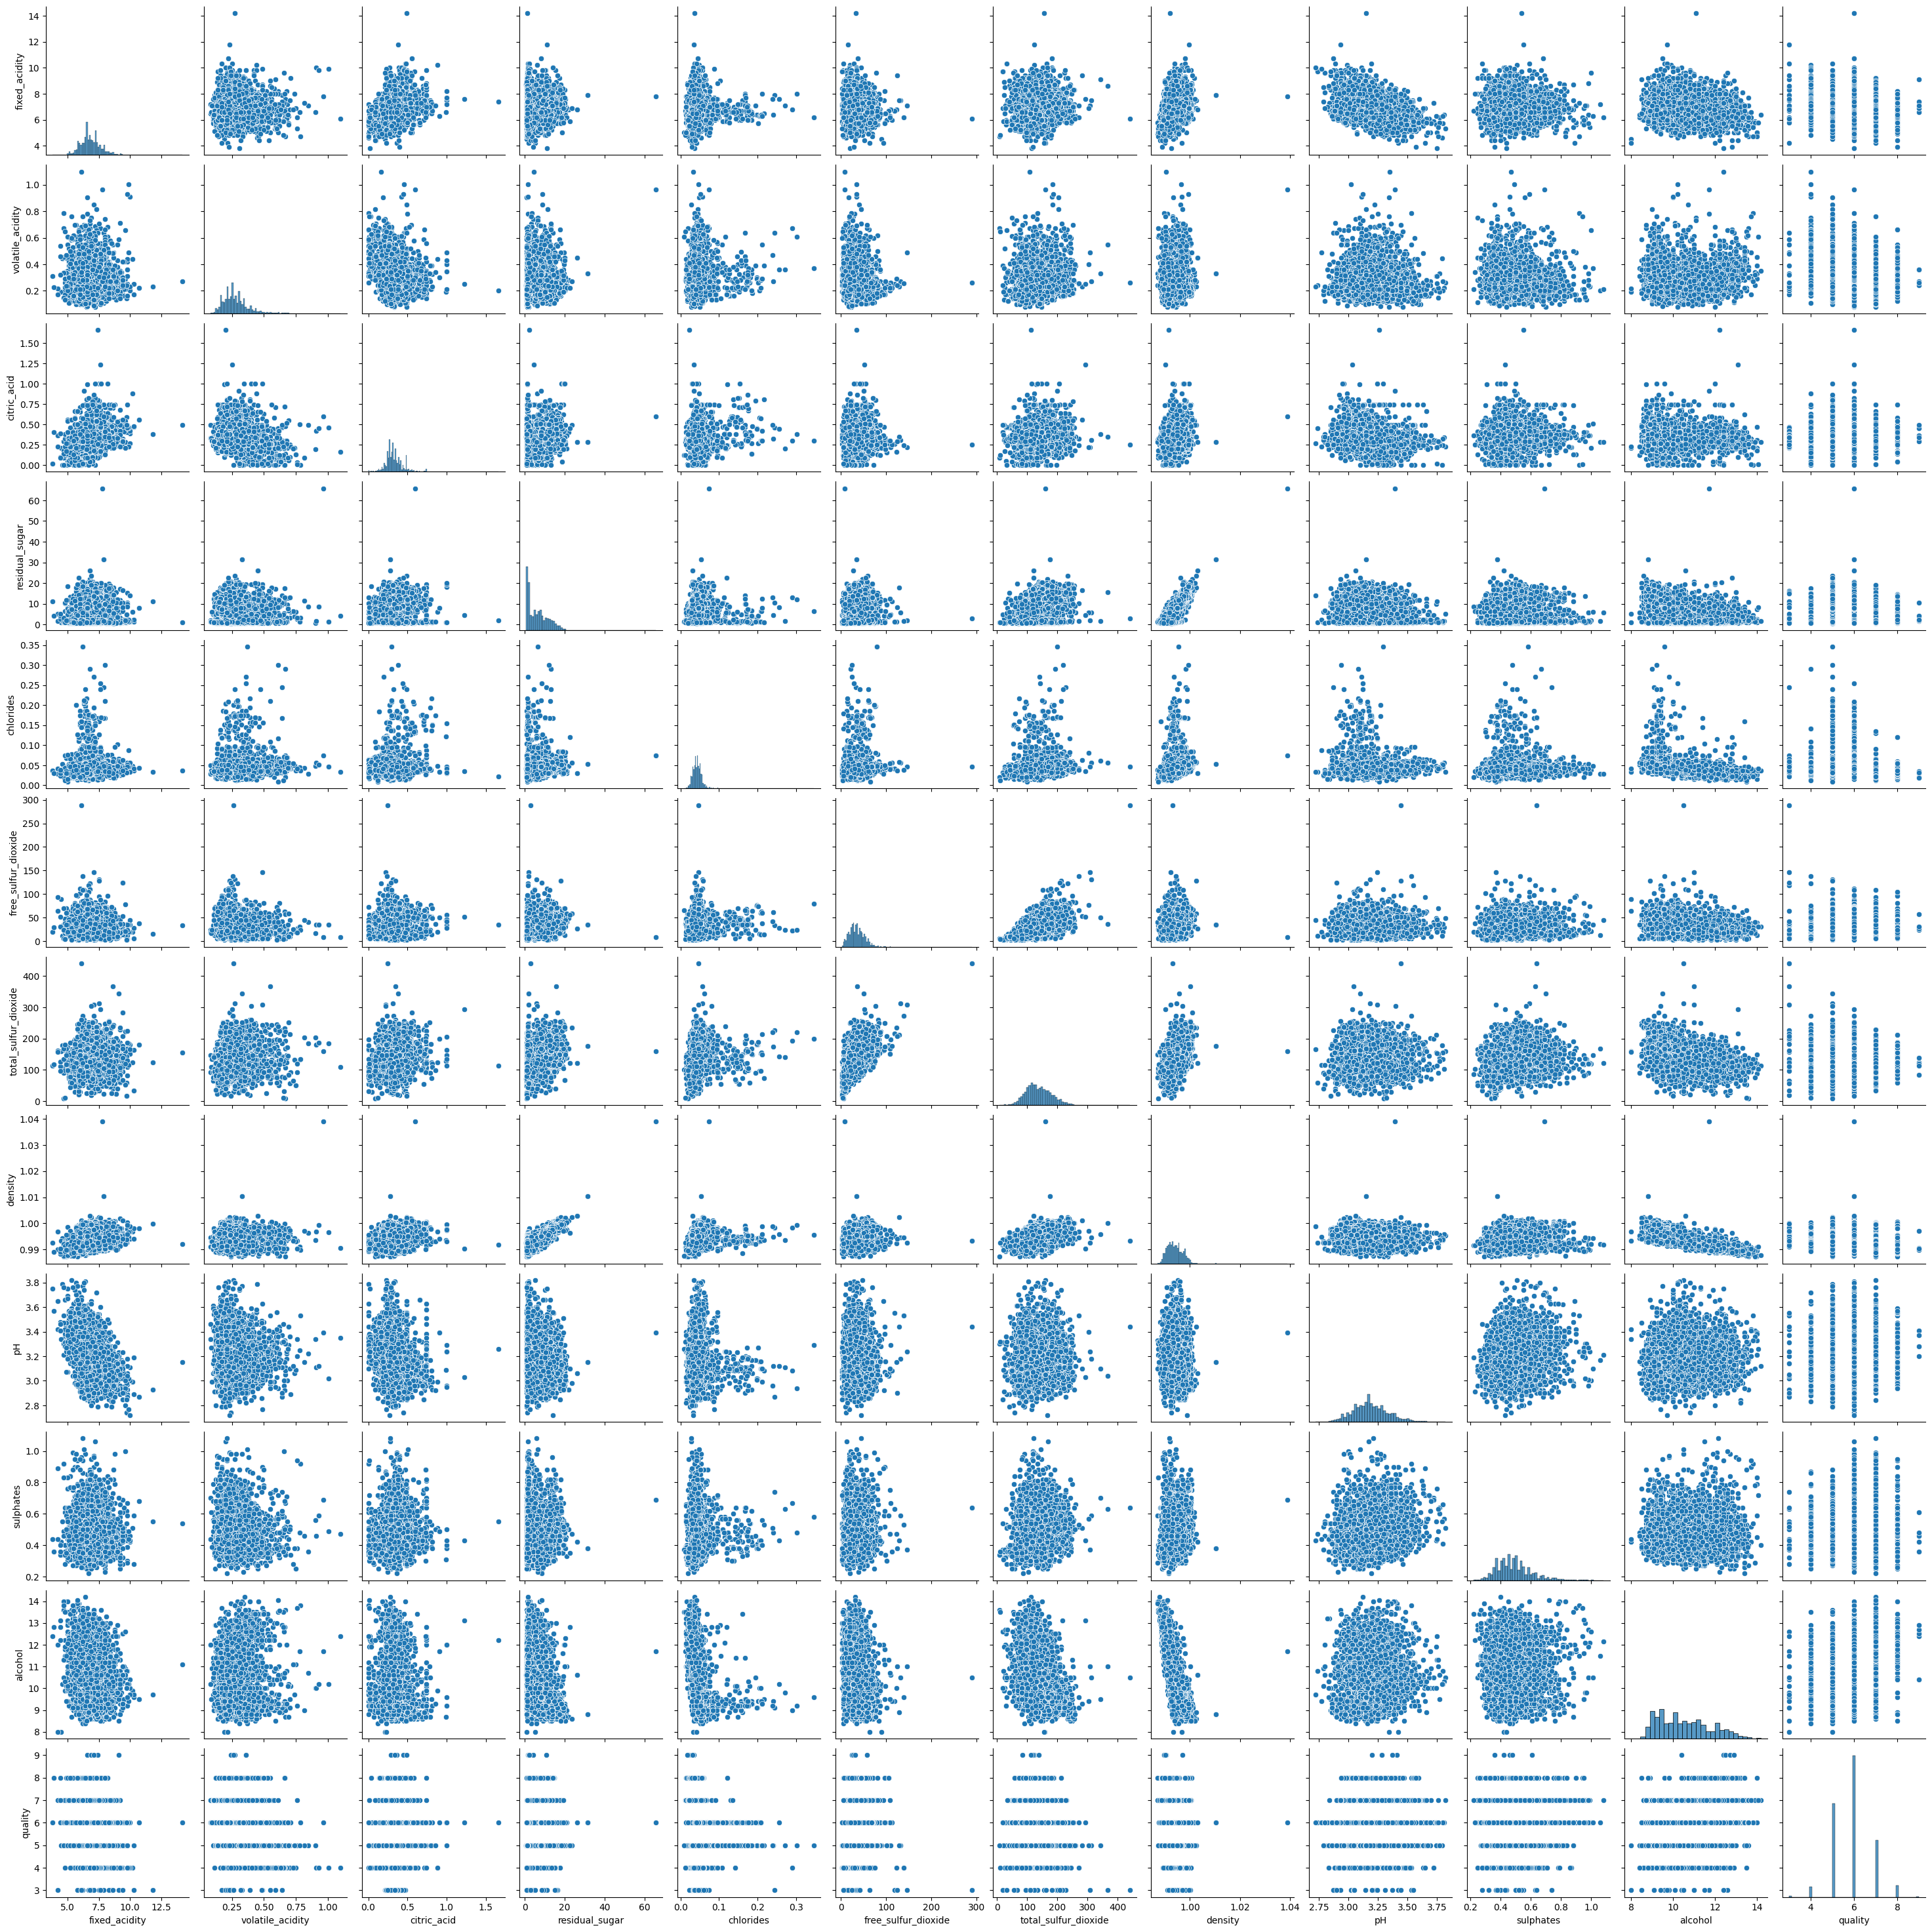

In [23]:
#Gráfico exploratorio por pares de variables
sns.pairplot(continuas);

In [24]:
#La matriz de correlaciones
correlation_matrix=continuas.corr()
continuas.corr();

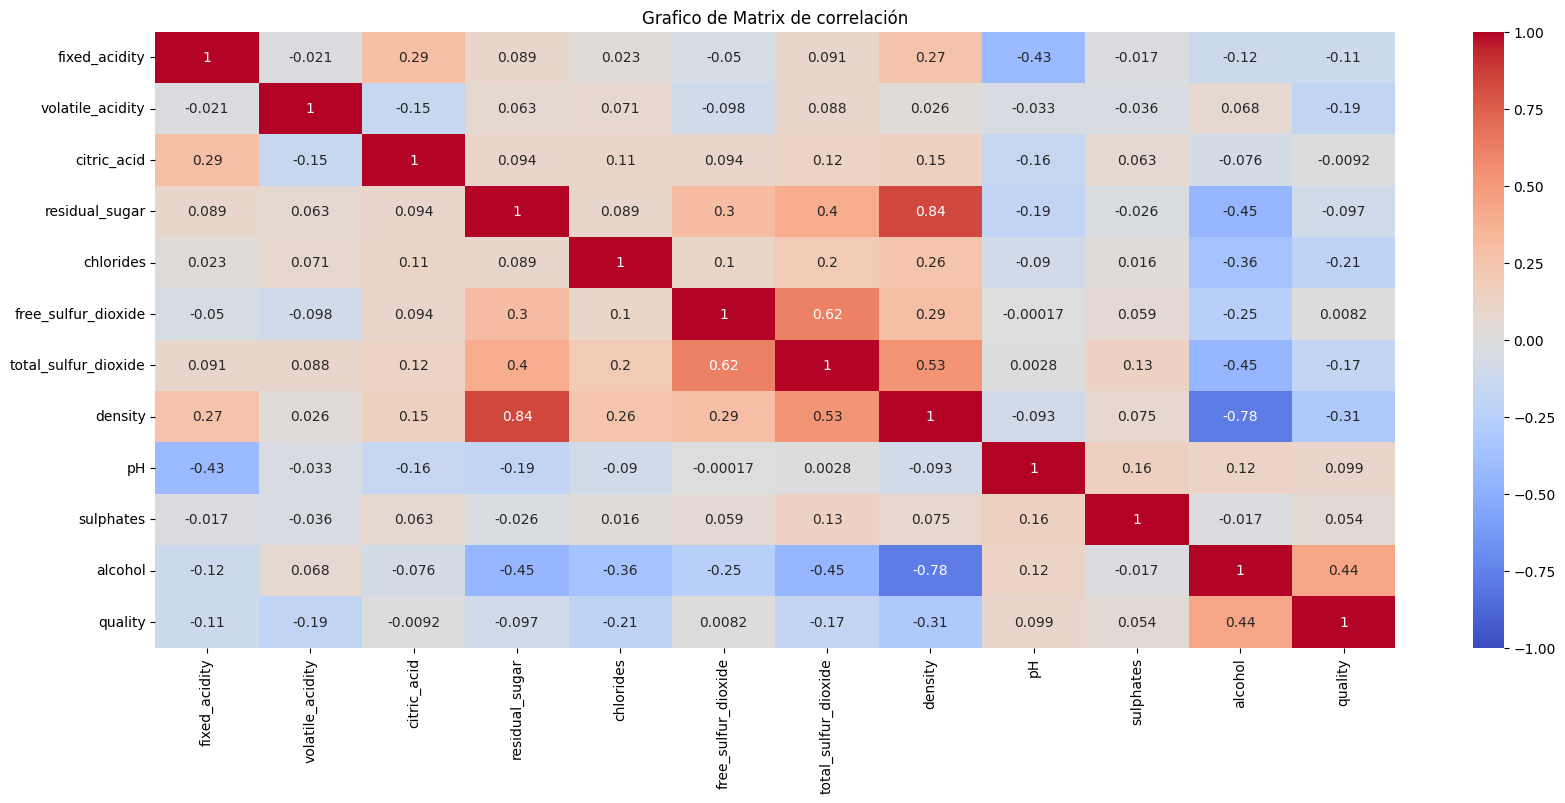

In [26]:
plt.figure(figsize=(20, 8))
ax = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm",center=0, vmin=-1, vmax=1);
ax.set_title("Grafico de Matrix de correlación")
plt.show()


#Insights del EDA (Vino Blanco)

Para el caso de el dataset , el de vino blanco es significativamente más grande que el de vino tinto por lo que orientamos nuestro modelo solo a tomar la base de Vino blanco de ahroa en adelante, despues del análisis exploratorio de los datos nuestras conclusiones son teniendo en cuenta que nuestra variable objetivo es quality:

1)	La correlación de quality con la varible alcohol es   Positiva Fuerte Es la característica con mas correlacion. A mayor contenido de alcohol, mayor es la puntuación de calidad percibida.
2)	La correlación con volatile acidity Negativa Fuerte siendo la segunda variable más importante. Un aumento en la acidez volátil (sabor a vinagre) reduce drásticamente la calidad.
3)	La density es Negativa media, ósea a Vinos más ligeros (menor densidad) tienden a tener mejor calidad.
4)	La varible residual sugar Positiva media, y quiere decir que  influye positivamente en el vino blanco (donde los sabores más dulces son comunes), a diferencia del tinto.


##Distribucion de la variable Quality :

•	La distribución de la variable quality (objetivo) está muy concentrada en las puntuaciones 6 y 5.
•	Hay muy pocas instancias de vinos de muy baja calidad (3) o muy alta calidad (9). Esto significa que el modelo tendrá dificultades para predecir estos valores extremos y se centrará en el rango medio.

##Escalado :

Debido a que los valores de las varibles tienes valores diferentes por ejemplo Alcohol y PH debemos escalar el dataset.
